In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


# отключим предупреждения Anaconda
import warnings

warnings.simplefilter("ignore")

# будем отображать графики прямо в jupyter'e
%matplotlib inline

# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

# увеличим дефолтный размер графиков
from pylab import rcParams

rcParams["figure.figsize"] = 8, 5
import pandas as pd



import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

In [25]:
train_df = pd.read_csv("train.csv", index_col='Id')
test_df = pd.read_csv("test.csv", index_col='Id')


## Data Preparation

### Распределение данных.

In [26]:
numerical_column = train_df.select_dtypes(include=['float64', 'int64']).columns
categorial_column = train_df.select_dtypes(include=['object']).columns

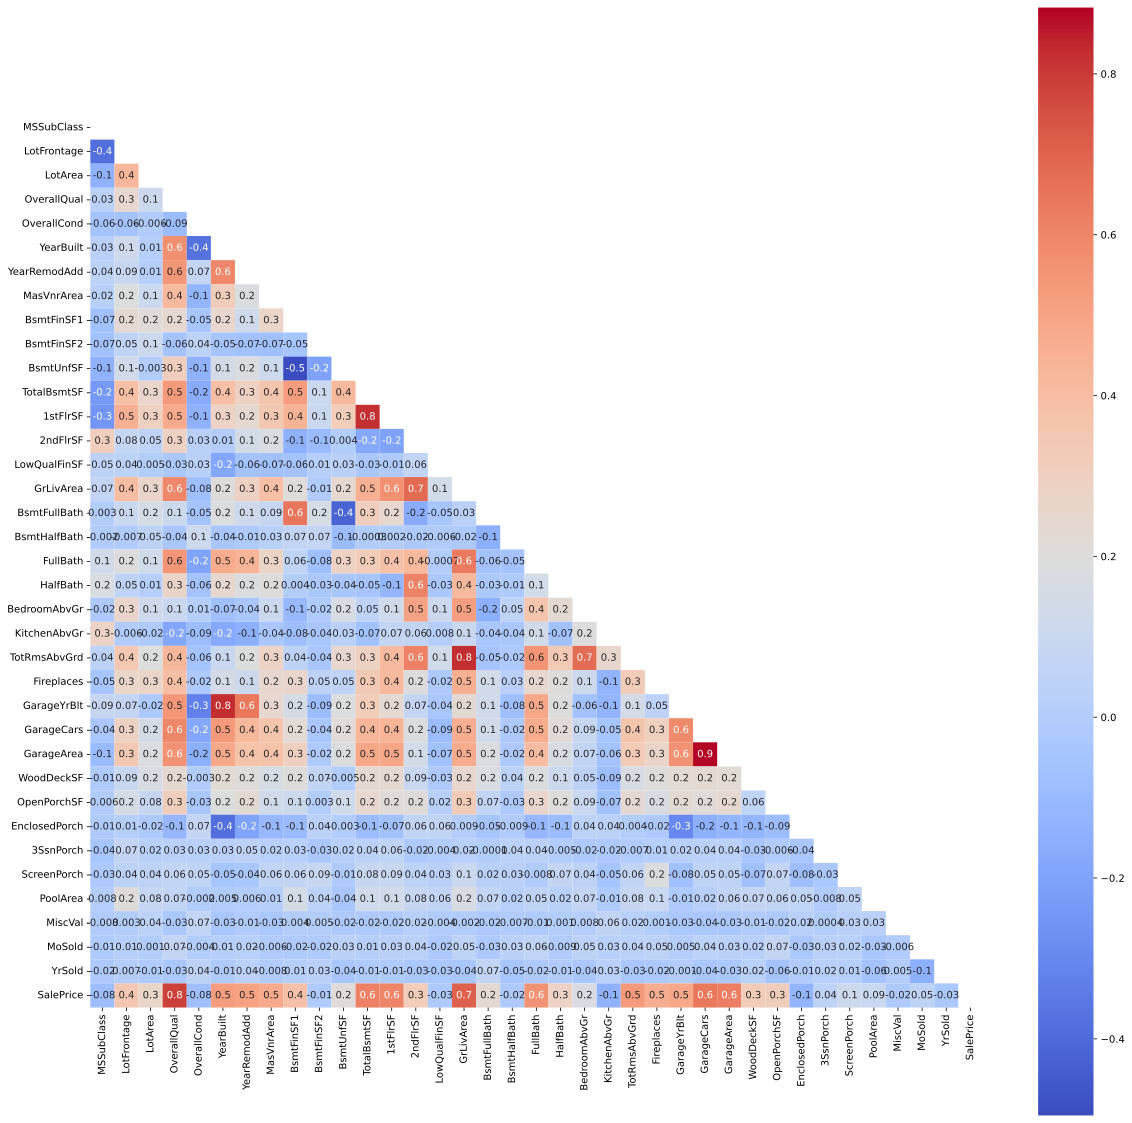

In [27]:
plt.figure(figsize=(20, 20))
matrix = np.triu(train_df[numerical_column].corr())
sns.heatmap(data=train_df[numerical_column].corr(), 
            mask=matrix,
            annot = True, 
            fmt='.1g', 
            cmap= 'coolwarm',
            square=True);

#### Количественные

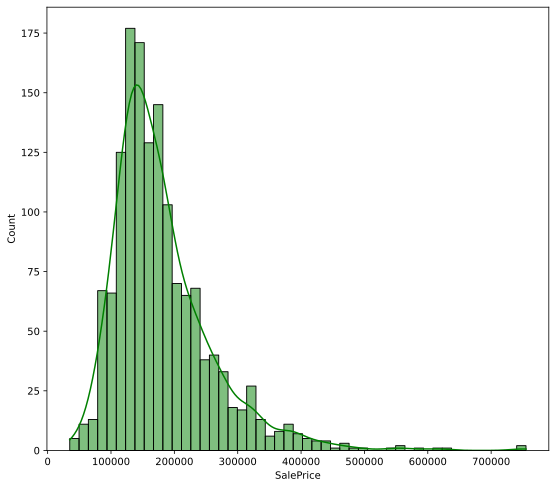

In [28]:
# Целевая переменная.
plt.figure(figsize=(9, 8))
sns.histplot(train_df['SalePrice'], color='g', kde=True);

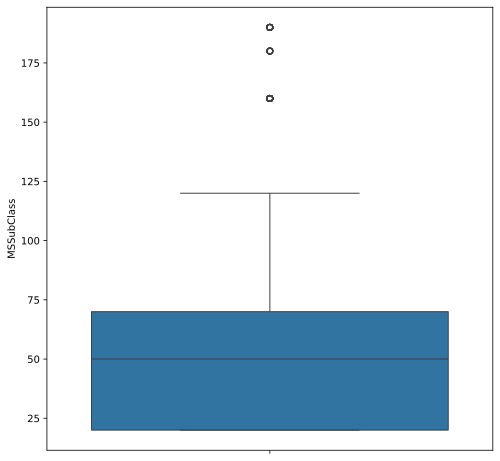

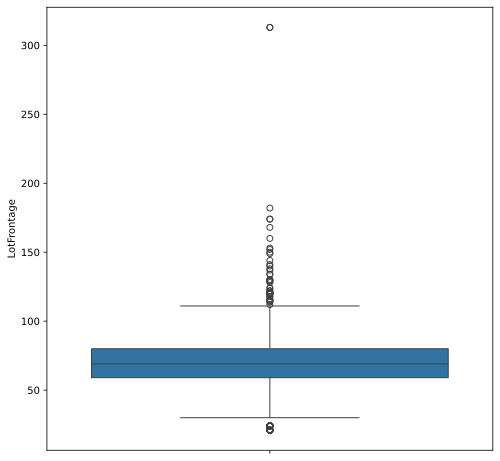

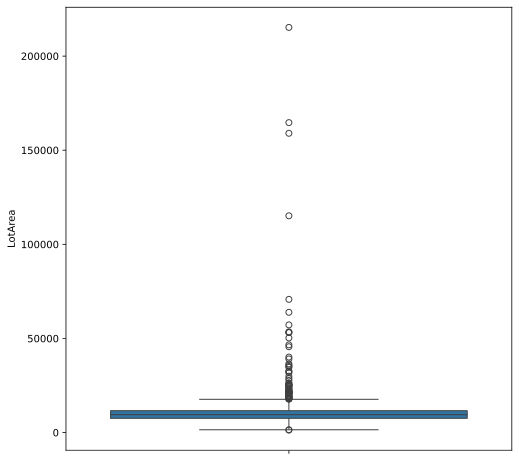

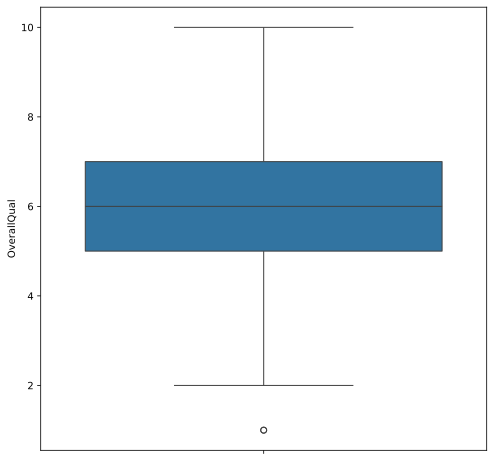

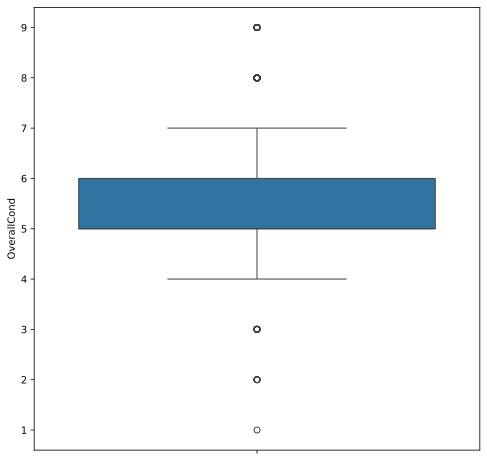

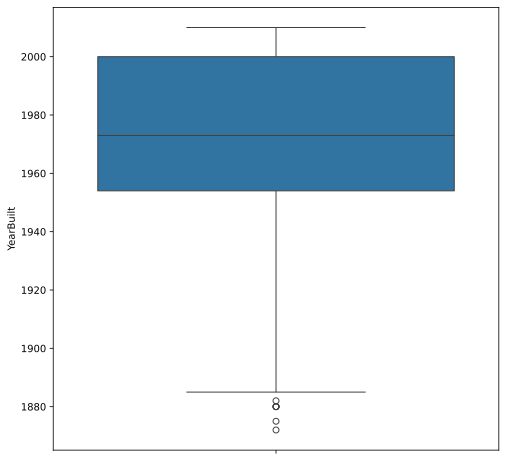

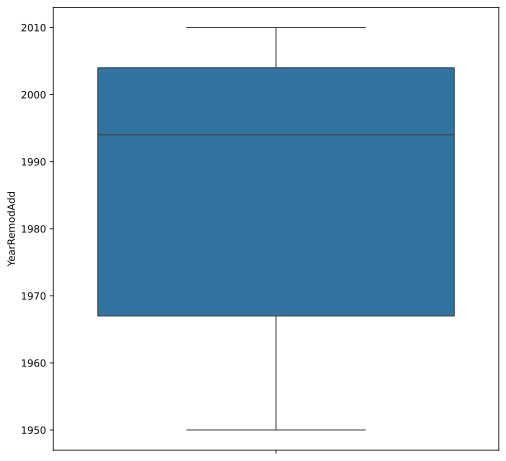

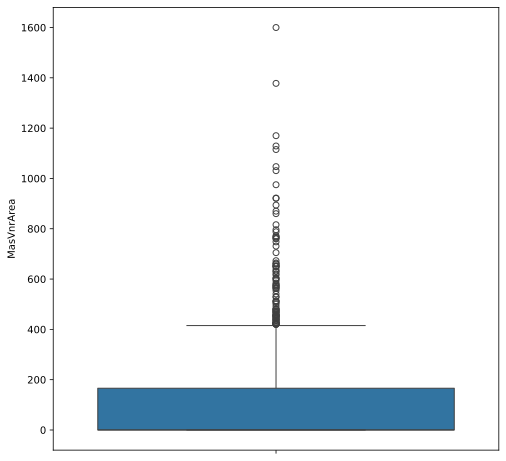

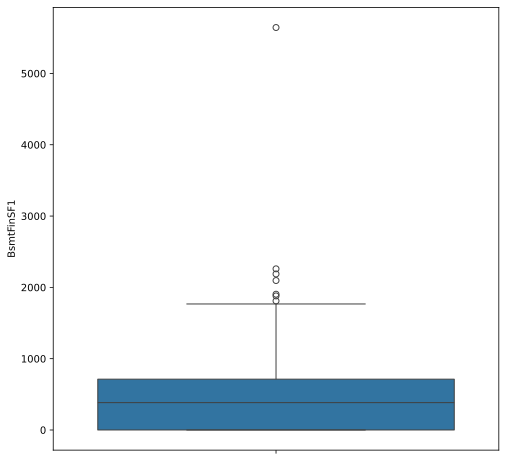

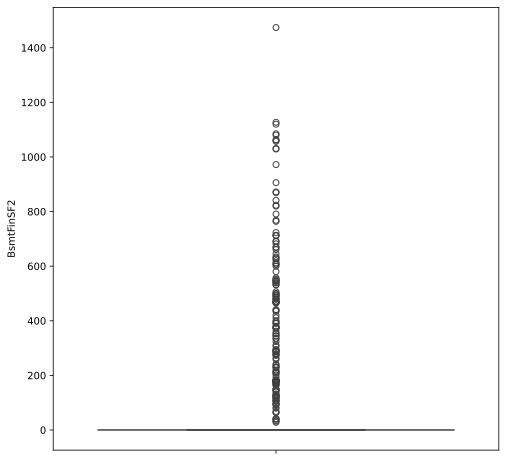

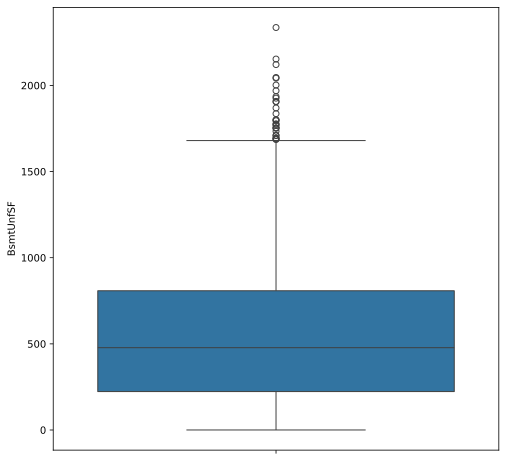

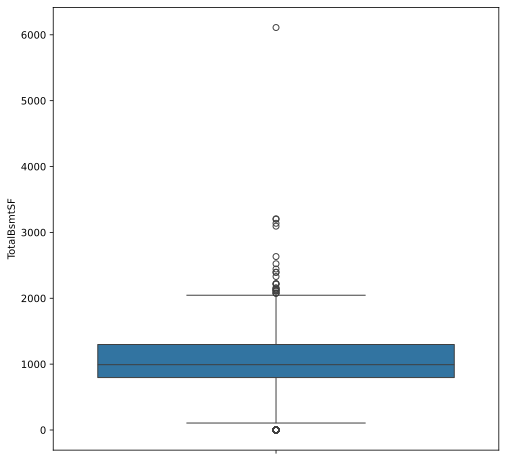

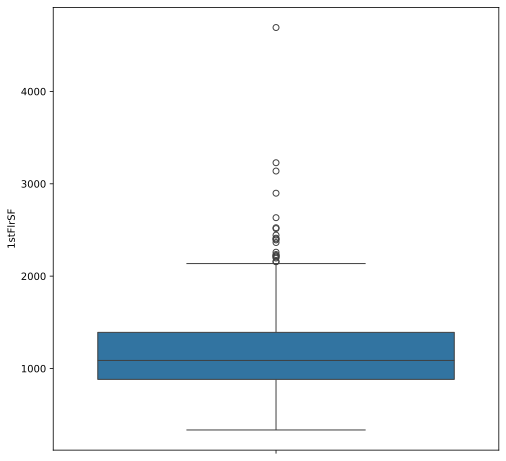

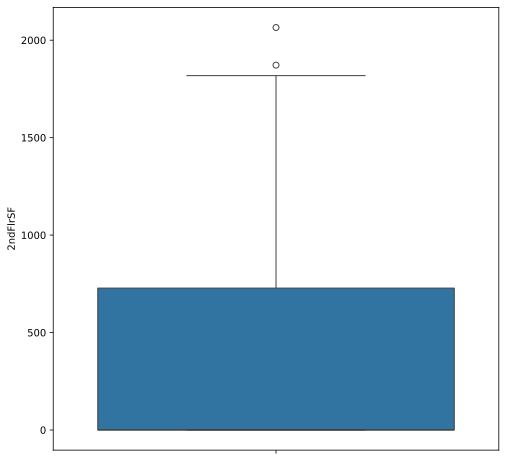

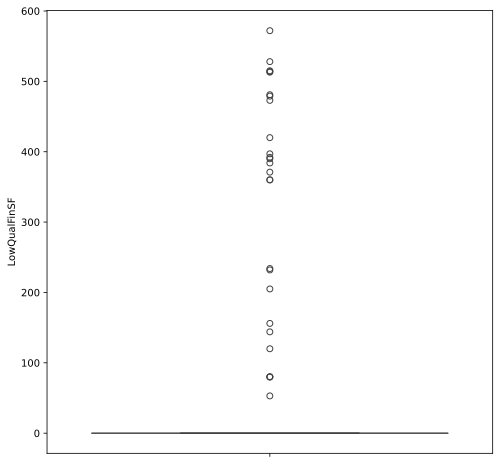

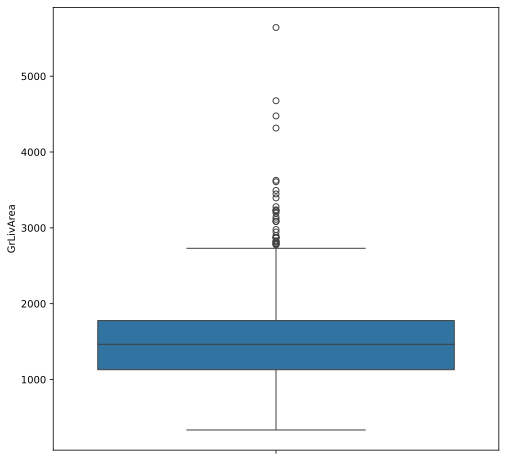

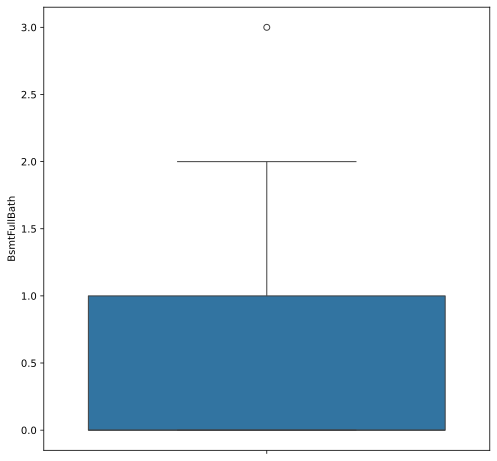

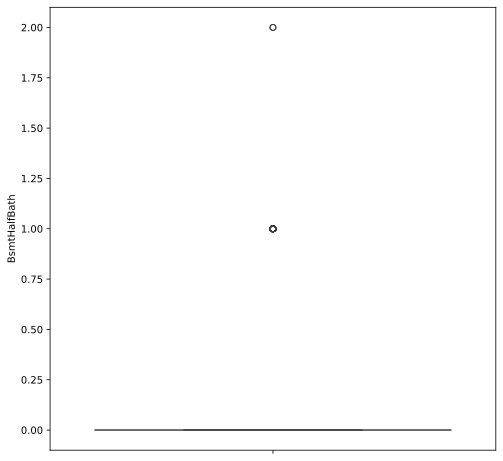

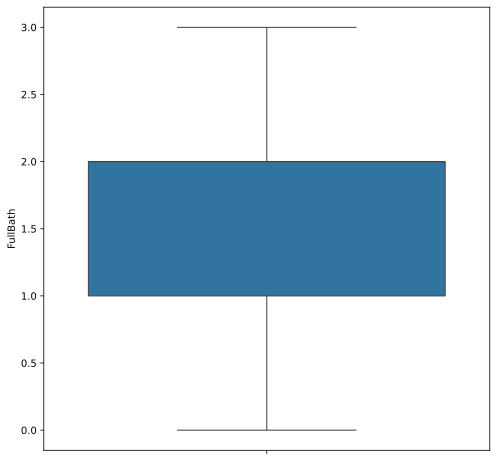

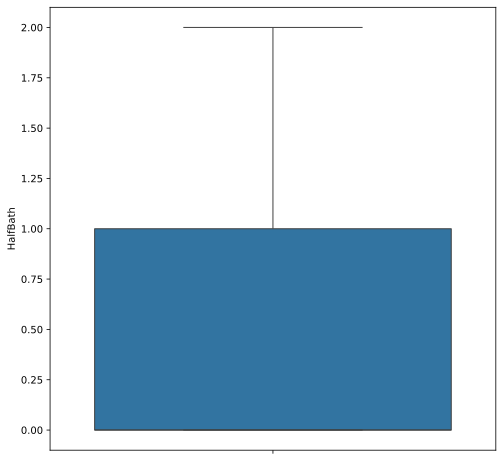

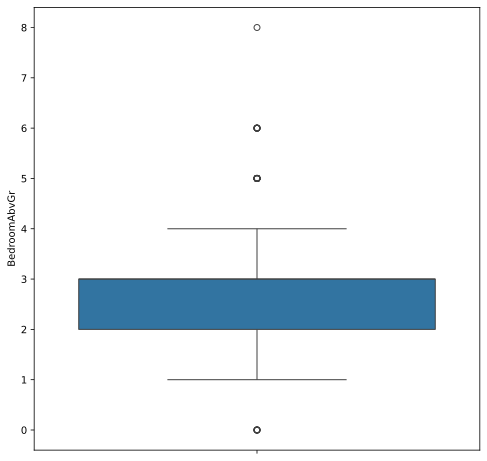

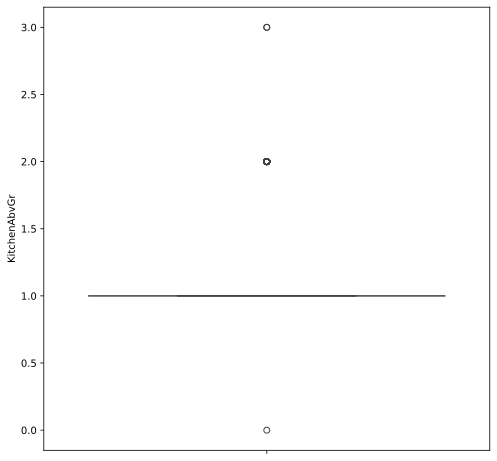

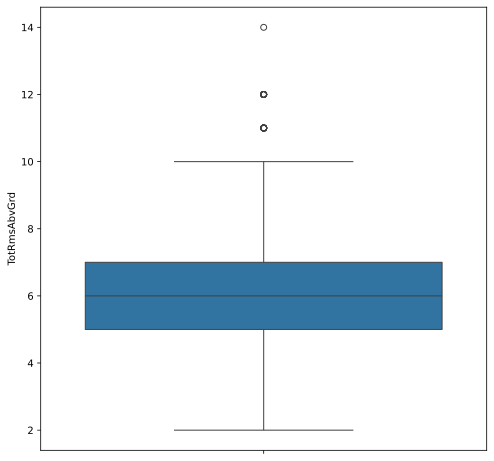

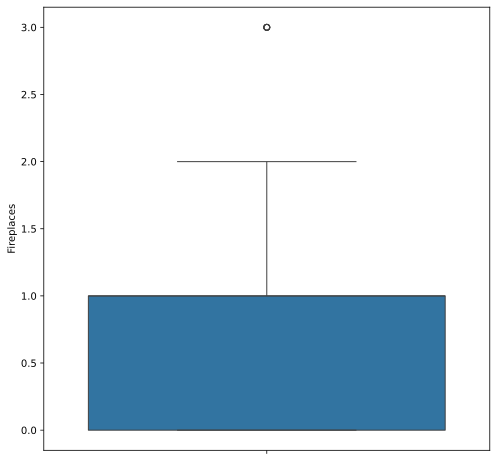

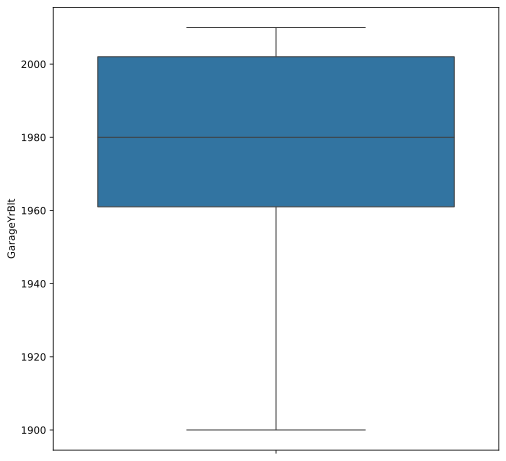

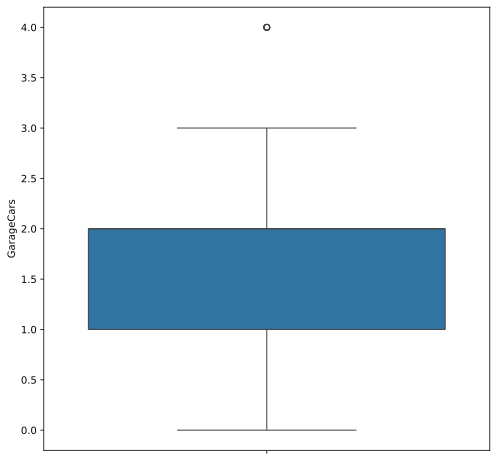

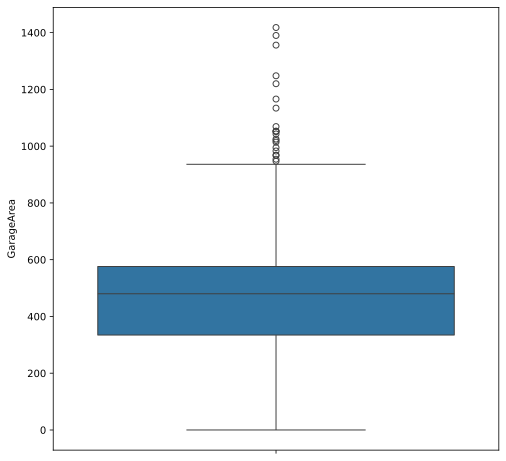

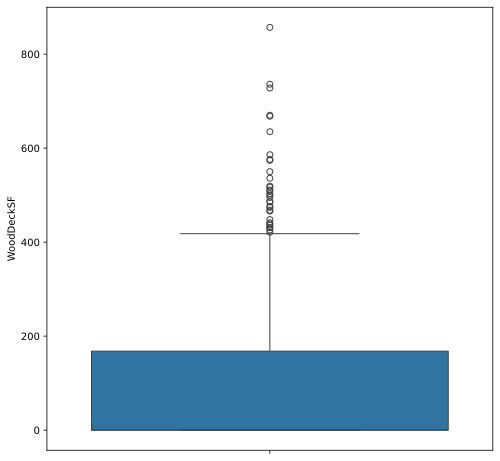

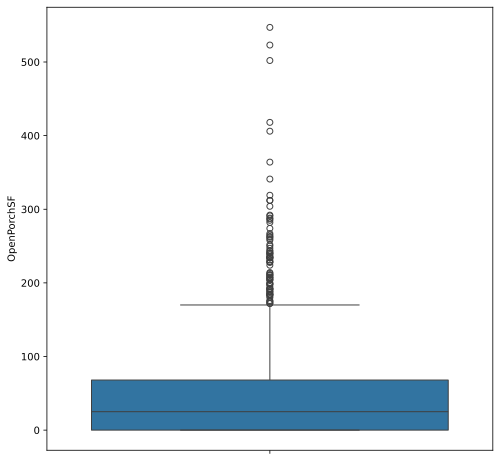

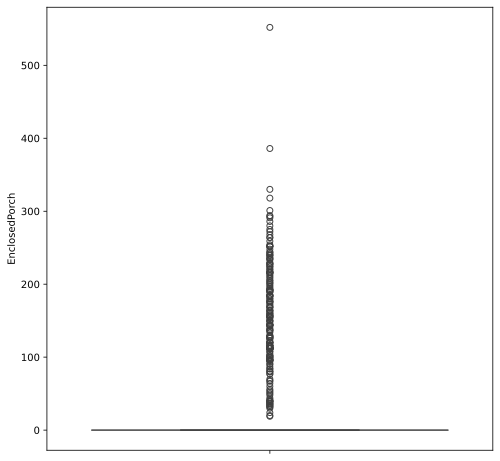

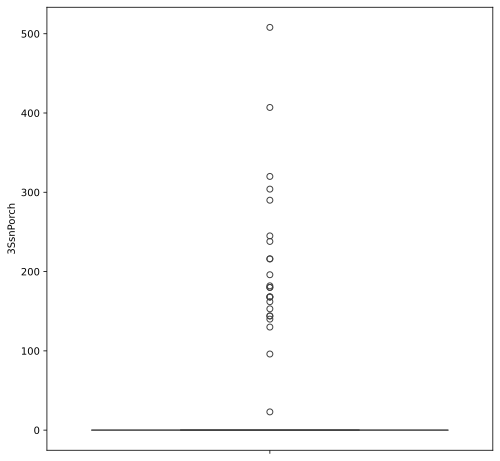

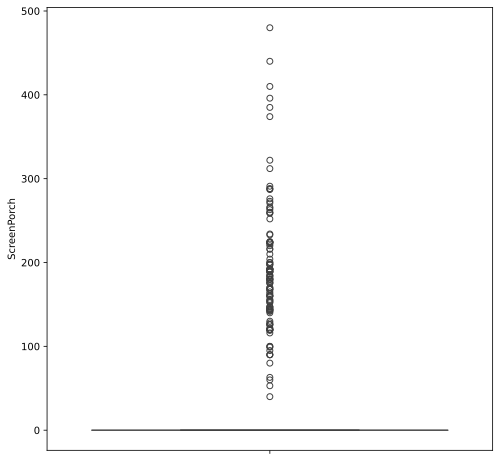

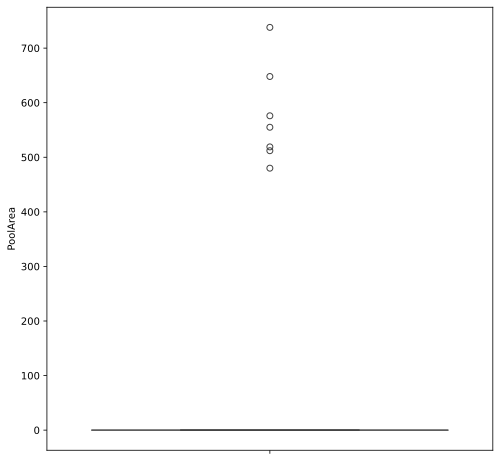

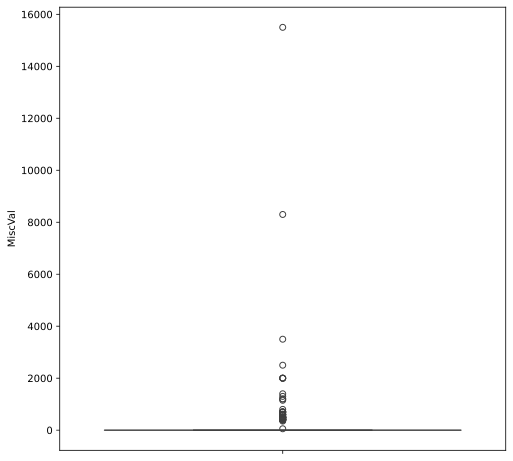

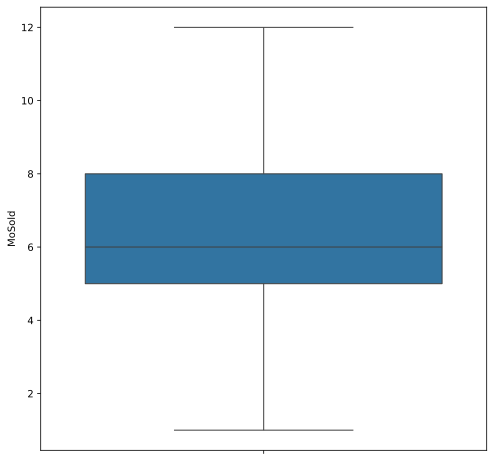

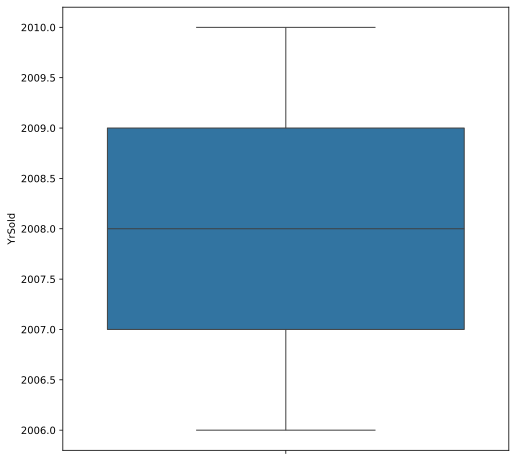

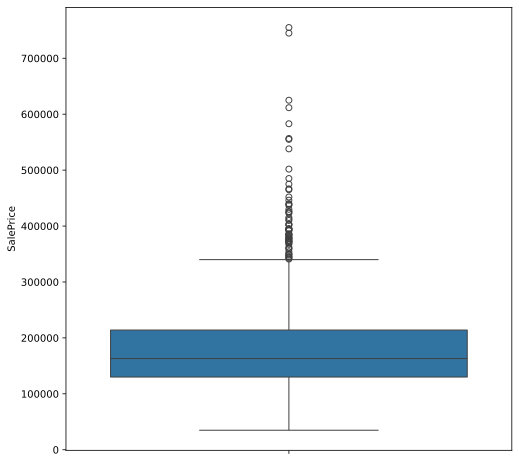

In [29]:
for numerical in numerical_column:
    fig = plt.figure(figsize=(8, 8))
    sns.boxplot(train_df[numerical])

#### Работа с дубликатами

In [30]:
# Удалим дубликаты
train_df.drop_duplicates()
train_df.shape

(1460, 80)

Дубликатов не было


### Работа с пропусками

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [32]:
train_df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [33]:
missing_values = ((train_df.isna().sum()) / len(train_df) * 100)
drop_columns = []
for column, count in zip(train_df.columns, missing_values):
    if count != 0:
        print(column, count)
    if count > 20:
        drop_columns.append(column)

drop_columns

LotFrontage 17.73972602739726
Alley 93.76712328767123
MasVnrType 59.726027397260275
MasVnrArea 0.547945205479452
BsmtQual 2.5342465753424657
BsmtCond 2.5342465753424657
BsmtExposure 2.6027397260273974
BsmtFinType1 2.5342465753424657
BsmtFinType2 2.6027397260273974
Electrical 0.0684931506849315
FireplaceQu 47.26027397260274
GarageType 5.5479452054794525
GarageYrBlt 5.5479452054794525
GarageFinish 5.5479452054794525
GarageQual 5.5479452054794525
GarageCond 5.5479452054794525
PoolQC 99.52054794520548
Fence 80.75342465753424
MiscFeature 96.30136986301369


['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [34]:
for column in train_df.columns:
    print("=" * 15)
    print(column)
    print(train_df[column].describe())

MSSubClass
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
MSZoning
count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
LotFrontage
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
LotArea
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
Street
count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object
Alley
count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object
LotShape
count     1460
unique       4
top        Reg
freq       

In [35]:
train_df = train_df.drop(drop_columns, axis=1)

In [36]:
train_df.shape

(1460, 74)

### Заполним пропуски.

In [37]:
# Количественные заменим на медиану
train_df_pred = train_df.copy()
for column in numerical_column:
    train_df_pred[column] = train_df_pred[column].fillna(train_df_pred[column].median()) 

In [38]:
# Категориальные заменим на моду
categorial_column_drop = train_df.select_dtypes(include=['object']).columns

for column in categorial_column_drop:
    train_df_pred[column] = train_df_pred[column].fillna(train_df_pred[column].mode()[0]) 

In [39]:
train_df_pred.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

### Предобработка категориальных фич.

In [44]:
for column in categorial_column_drop:
    print("=" * 15)
    print(column)
    print(train_df_pred[column].unique())

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
Street
['Pave' 'Grvl']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkF

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
ohe = OneHotEncoder()
train_df_pred_ohe = train_df_pred.copy()
ohe.fit(train_df_pred[categorial_column_drop])
train_df_pred_ohe[ohe.get_feature_names_out()] = ohe.transform(train_df_pred[categorial_column_drop]).todense()
train_df_pred_ohe = train_df_pred_ohe.drop(categorial_column_drop, axis=1)

## Modeling

### RandomForestRegressor

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(train_df_pred_ohe.drop('SalePrice', axis=1), train_df_pred_ohe.SalePrice, test_size=0.3, random_state=42)

In [60]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
predict = rfr.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error

In [78]:
y_test - predict

Id
893     13349.18
1106     7438.36
414     -1182.29
523      5686.66
1037     2751.59
          ...   
332      1244.25
324       563.75
651      6424.71
440    -23403.54
799     68517.09
Name: SalePrice, Length: 438, dtype: float64

In [90]:
np.sqrt(mean_squared_error(y_test, predict))

27043.477429116356

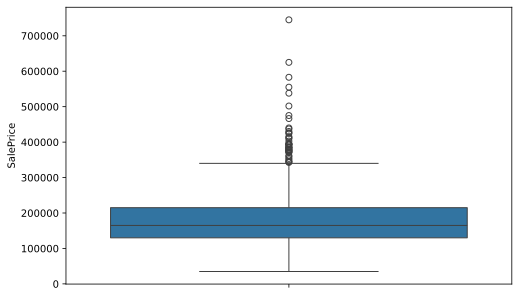

In [94]:
sns.boxplot(y_train);

In [ ]:
def visualization()

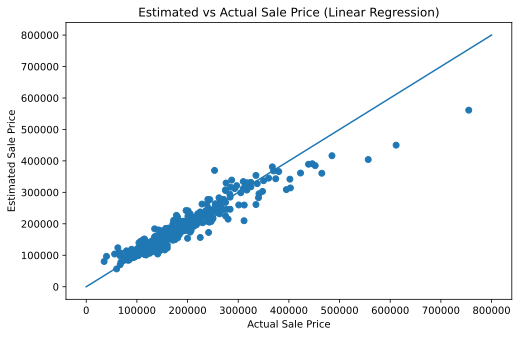

In [93]:
plt.scatter(y_test, predict)
plt.xlabel('Actual Sale Price')
plt.ylabel('Estimated Sale Price')
plt.title('Estimated vs Actual Sale Price (Linear Regression)')
x_values = np.linspace(0, 800000, 1000)
plt.plot(x_values, x_values, label='Estimated = Actual')